[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW10.ipynb)

**Problem 1**: Insurance companies will use individual characteristics to predict how much an individual will cost in order to reserve enough money on hand to cover expenses. A small data set has been prepared with insurance charges and bmi (body mass index) values for individuals. You can get the data using the following code.

In [3]:
import pandas as pd
import numpy as np
insurance = pd.read_csv("https://richardson.byu.edu/220/insurance.csv")

!pip install bambi
!pip install pydataset

In [6]:
import bambi as bmb
import arviz as az
import matplotlib.pyplot as plt

Fit a Bayesian model predicting charges using BMI as the only predictor. Use N(0,1000) priors for $\beta_0$ and $\beta_1$. Report the Bayes estimates for $\beta_0$ and $\beta_1$.

Output()

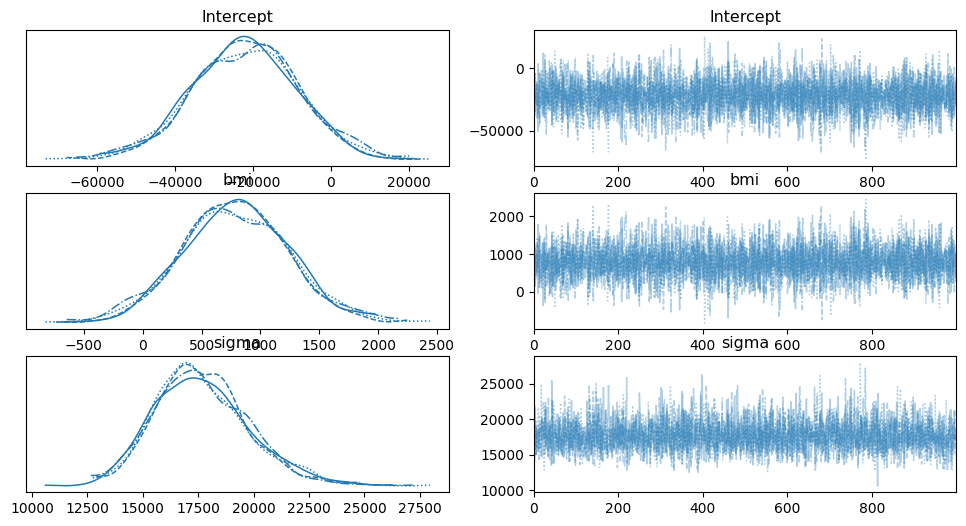

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-22056.390,13563.208,-49129.979,2265.402,204.310,224.049,4436.0,2769.0,1.0
bmi,785.624,451.145,-48.871,1662.846,6.785,7.406,4444.0,2883.0,1.0
sigma,17670.619,2128.291,13780.675,21616.727,33.291,34.264,4176.0,2794.0,1.0


In [13]:
model = bmb.Model("charges ~ bmi",insurance)

priors = {
"Intercept": bmb.Prior("Normal", mu=0, sigma=1000),
"bmi": bmb.Prior("Normal", mu=0, sigma=1000)
}
model.set_priors(priors=priors)

results = model.fit(draws=1000, chains=4)

az.plot_trace(results)
plt.show()

az.summary(results)

**Problem 2**:  

Part a. Fit the model again, but this time using a prior for $\beta_0$ and $\beta_1$ of N(0,0.001).

Output()

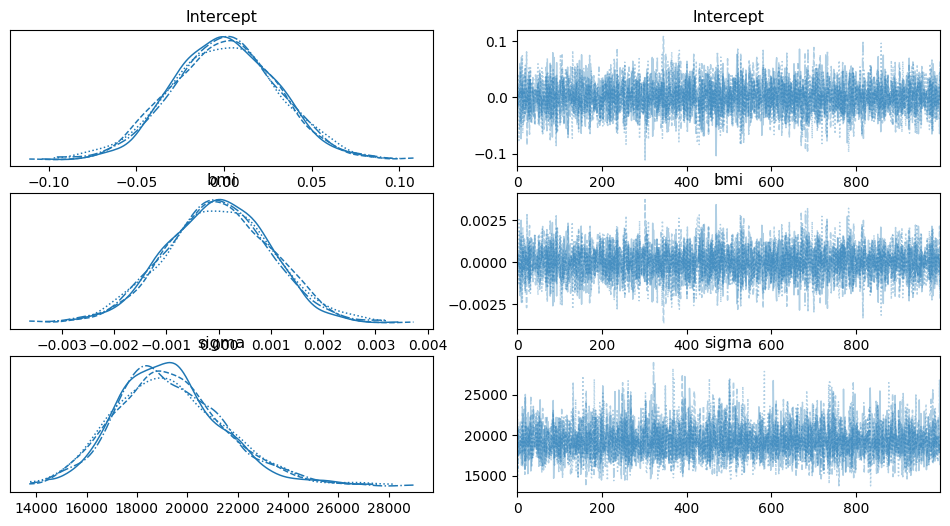

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.000,0.030,-0.054,0.057,0.000,0.000,5873.0,3023.0,1.0
bmi,-0.000,0.001,-0.002,0.002,0.000,0.000,5875.0,3048.0,1.0
sigma,19339.998,2173.846,15306.097,23386.925,27.831,38.582,6433.0,2862.0,1.0


In [14]:
model = bmb.Model("charges ~ bmi",insurance)

priors = {
"Intercept": bmb.Prior("Normal", mu=0, sigma=0.001),
"bmi": bmb.Prior("Normal", mu=0, sigma=0.001)
}
model.set_priors(priors=priors)

results = model.fit(draws=1000, chains=4)

az.plot_trace(results)
plt.show()

az.summary(results)

Part b. What are the Bayes estimates for Beta_0 and Beta_1?

For Beta_0, the estimate is 0 and for beta_1, the estimate is -0.

Part c. How are these different than the estimates in Problem 1?

They are much different than the estimates in Problem 1. The new intercept and beta_1 are -22056 and 785.

Part d. Explain why these are different.

Because the variance is so little in these new priors, the data is being pulled closer to 0 unlike the variance so high in the first problem which has wider parameters for the estimates to be wider.

**Problem 3**: The Phillip's curve is a classical Economics concepts that states that there is an inverse relationship between inflation rate and unemployment rate. You can find out more about it here: https://en.wikipedia.org/wiki/Phillips_curve
I've prepared a data set for you to load that has both inflation rate and unemployment rates for several months. Run the following code to load the data into your environment:

In [17]:
import pandas as pd
phillips = pd.read_csv("https://richardson.byu.edu/220/Phillips.csv")

Part a. Read about the Phillip's curve online, the Wikipedia page will suffice: https://en.wikipedia.org/wiki/Phillips_curve. Using this information, decide on what you believe would be a good prior for the slope and intercept in a Bayesian linear model where inflation is the target variable and unemployment rate is the target. Write down your priors and justify your reasoning.

Intercept could have a prior of (2, 4). The inflation rate is usually around 2%, but 4 gives it enough variation to not limit the potential rates. For the slope, (-0.5, 0.25) would be good priors in my mind. The slope is down sloping and small. The prior gives enough variation.

Part b. What is an example of a bad prior in this scenario? Justify your reasoning.

(1000, 0.0001) and (20, 0.0001) are bad examples. The inflation rate would have to be 1000 according to the variation and mean which is almost never true for the US. Also, the slope would have to be positive and large which is the exact opposite of the truth.

**Problem 4**:

Part a. Using the good prior you decided on in 3a, fit a Bayesian linear model on the provided data using CPI as the target and Unemp as the only predictor.

Output()

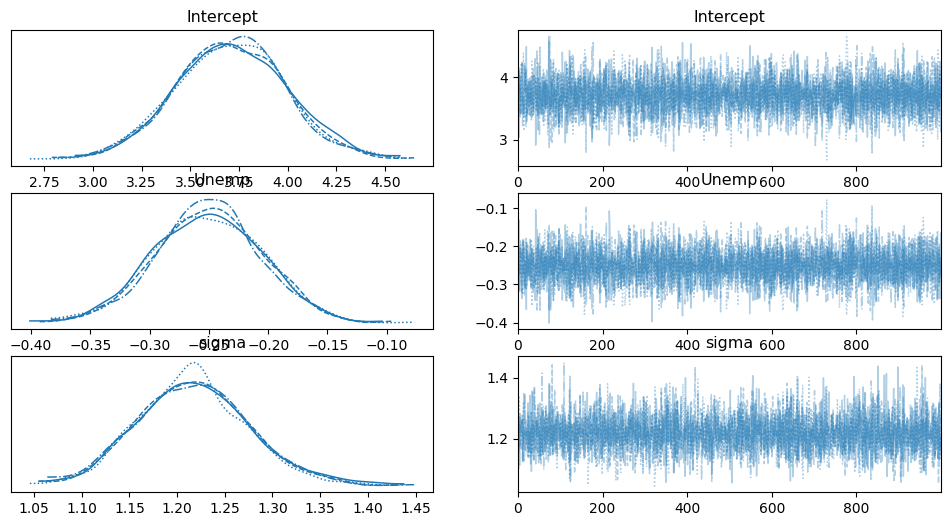

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,3.707,0.282,3.191,4.263,0.004,0.005,5953.0,2964.0,1.0
Unemp,-0.251,0.045,-0.336,-0.167,0.001,0.001,5975.0,2638.0,1.0
sigma,1.218,0.059,1.106,1.330,0.001,0.001,5409.0,3218.0,1.0


In [19]:
model = bmb.Model("CPI ~ Unemp",phillips)

priors = {
"Intercept": bmb.Prior("Normal", mu=2, sigma=4),
"Unemp": bmb.Prior("Normal", mu=-0.5, sigma=0.25)
}
model.set_priors(priors=priors)

results = model.fit(draws=1000, chains=4)

az.plot_trace(results)
plt.show()

az.summary(results)

Part b. Report the Bayes estimates for the parameters.

the Bayes estimates for these parameters are 3.707 and -0.251.

Part c. Plot the posterior draws for the model parameters.

In [29]:
intercept_post = posterior["Intercept"].values
print(f'Intercept: {intercept_post}')

posterior = results.posterior.stack({"draws":["chain","draw"]})
unemp_post = posterior["Unemp"].values
unemp_post
print(f'Unemployment: {unemp_post}')

Intercept: [3.67555641 3.74185277 3.43719659 ... 3.77148917 3.66541091 3.7702125 ]
Unemployment: [-0.24262143 -0.2502161  -0.2260764  ... -0.27216048 -0.23432947
 -0.26743295]


**Problem 5**

Part a. Using the Bayesian linear model output, what is the probability that the slope is positive?

In [27]:
print(sum(unemp_post > 0)/len(unemp_post))

0.0


Part b. What is the posterior probability that $\beta_1$ is greater than $-0.20$?

In [31]:
np.sum(unemp_post > -0.20 )/len(unemp_post)

np.float64(0.1315)